<a href="https://colab.research.google.com/github/LidianoJesus/Basic-Projects/blob/master/005_Case_Sa%C3%BAde_Prever_gasto_com_despesas_m%C3%A9dicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Modelo de Regressão Linear**

## **Case: Saúde**

Nesse caso foi usado os dados 'Base_Saude.csv'

In [ ]:
# Libs necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1º Etapa - Tratamento dos dados

In [ ]:
# Lendo a base de dados
Base_Dados = pd.read_csv('Base_Saude.csv')

In [ ]:
# Verificar os dados gerais
Base_Dados.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
# Renomeando as colunas
Base_Dados.rename( columns={
    'age' : 'Idade',
    'sex' : 'Sexo',
    'bmi' : 'IMC',
    'children' : 'Filho',
    'smoker' : 'Fumante',
    'region' : 'Regiao',
    'expenses' : 'Valor_Gasto',
}, inplace=True )

In [ ]:
# Verificar a formatação do tipo dos dados
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Idade        1338 non-null   int64  
 1   Sexo         1338 non-null   object 
 2   IMC          1338 non-null   float64
 3   Filho        1338 non-null   int64  
 4   Fumante      1338 non-null   object 
 5   Regiao       1338 non-null   object 
 6   Valor_Gasto  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


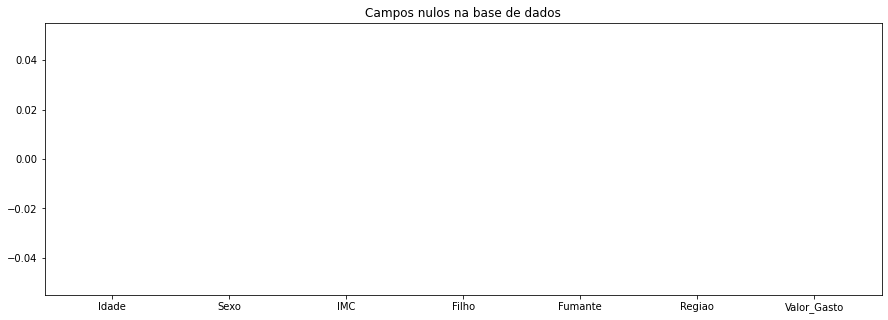

In [ ]:
# Verificando campos nulos
plt.figure( figsize=(15,5) )
Analise = Base_Dados.isnull().sum()
plt.bar( Analise.index, Analise, width=0.5, color='green' )
plt.title('Campos nulos na base de dados');

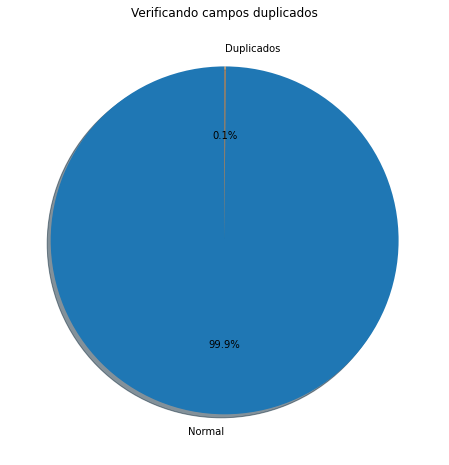

In [ ]:
# Verificando campos duplicados

# Analise dos campos duplicados
Campos_Duplicados = Base_Dados.duplicated().sum()
Total_Base = len( Base_Dados) - Campos_Duplicados
Lista_Valores = [ 1 - ( Campos_Duplicados / Total_Base ) , ( Campos_Duplicados / Total_Base ) ]
Rotulos = ['Normal', 'Duplicados']

# Plotagem
plt.figure( figsize=(8, 8) )
plt.pie( Lista_Valores, 
        labels=Rotulos, 
        shadow=True, 
        startangle=90, 
        autopct='%1.1f%%' )
plt.title('Verificando campos duplicados');

In [ ]:
# Vamos retirar os dados duplicados
print('Antes da remoção:', Base_Dados.shape[0] )

# Removendo as duplicadas
Base_Dados.drop_duplicates(inplace=True)

print('Depois:', Base_Dados.shape[0] )

Antes da remoção: 1338
Depois: 1337


In [ ]:
# Verificar campos unicos
Base_Dados.nunique()

# Veja ... tempos diversos tipos de caracteristicas em nossos dados

Idade            47
Sexo              2
IMC             275
Filho             6
Fumante           2
Regiao            4
Valor_Gasto    1337
dtype: int64

## **2º Etapa - EDA**

In [ ]:
Base_Dados.describe()

,Idade,IMC,Filho,Valor_Gasto
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


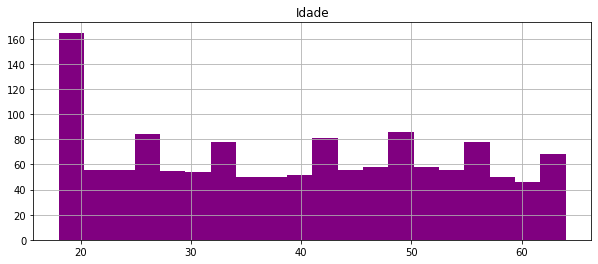

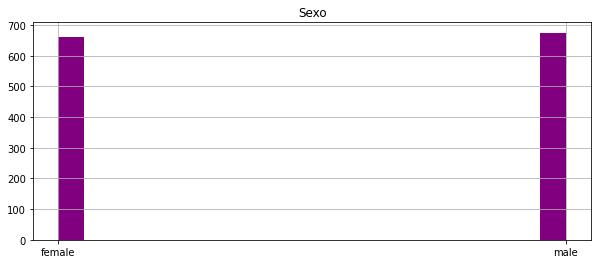

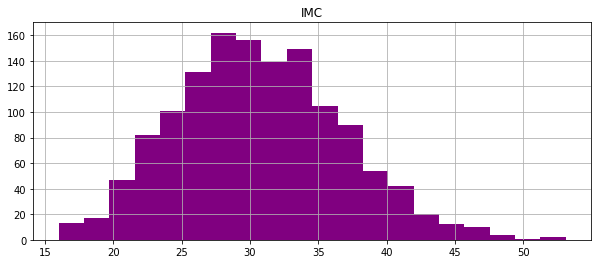

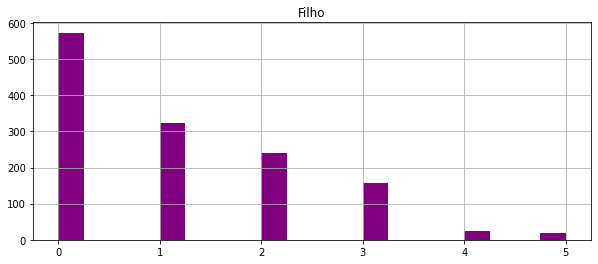

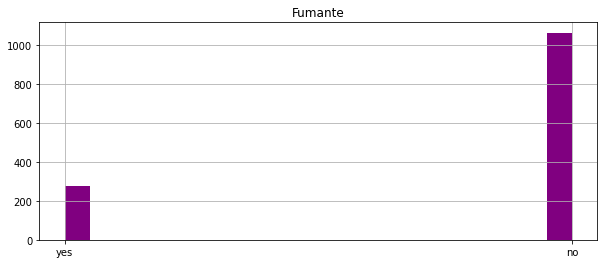

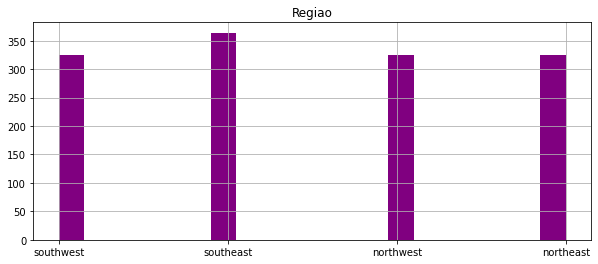

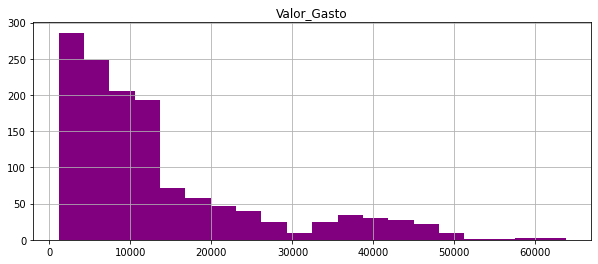

In [ ]:
# Plotar todas as colunas
for Coluna in Base_Dados.columns:
  # Defiindo o tamanho
  plt.figure(figsize=(10,4))
  # Titulo
  plt.title(Coluna)
  # Plot do gráfico
  Base_Dados[Coluna].hist( bins=20, color='purple' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

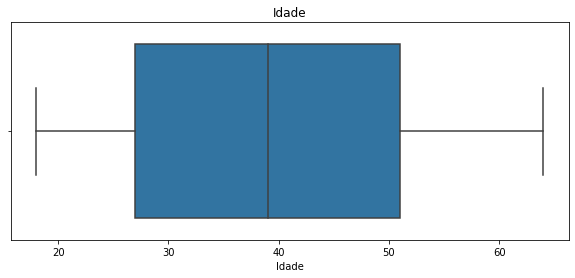

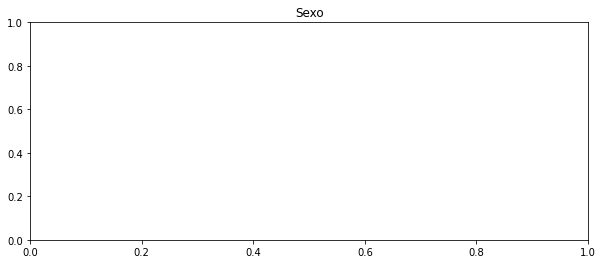

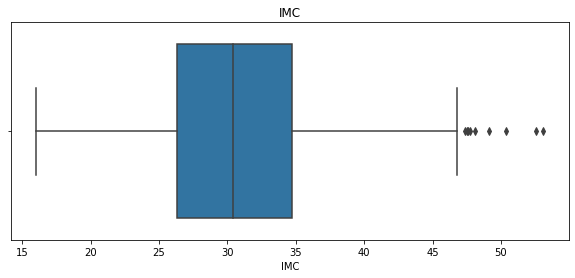

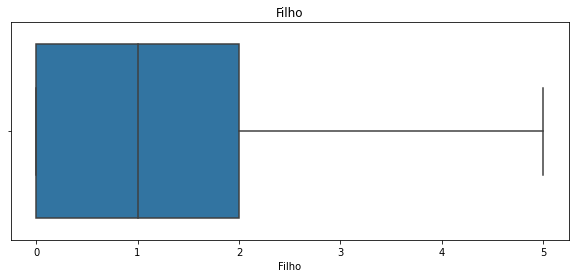

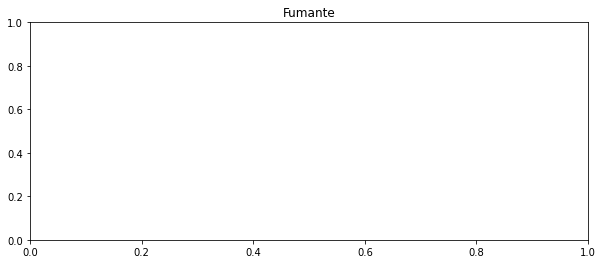

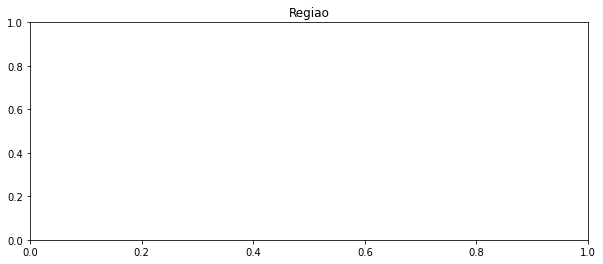

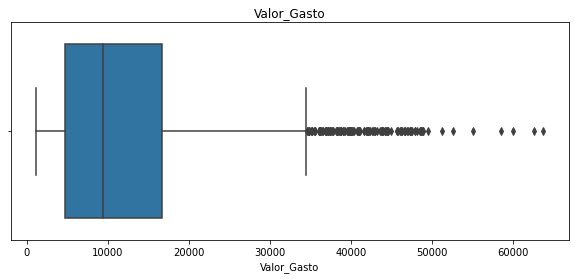

In [ ]:
# Plotar todas as colunas
for Coluna in Base_Dados.columns:
  # Defiindo o tamanho
  plt.figure(figsize=(10,4))
  # Titulo
  plt.title(Coluna)
  # Plot do gráfico
  try:
    sns.boxplot( Base_Dados[Coluna], orient='v' );
  except:
    pass

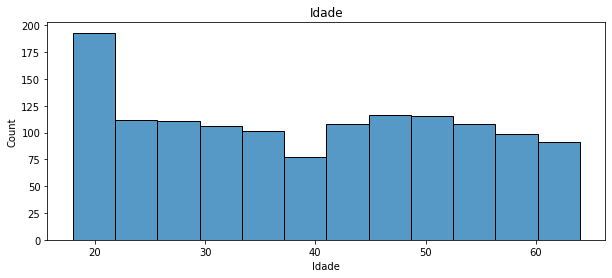

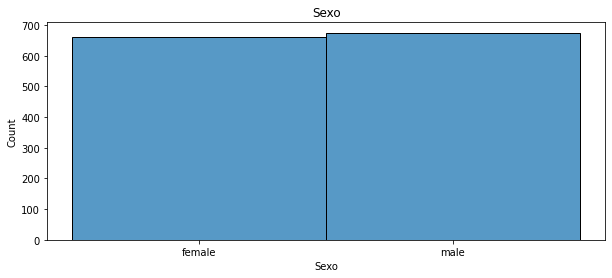

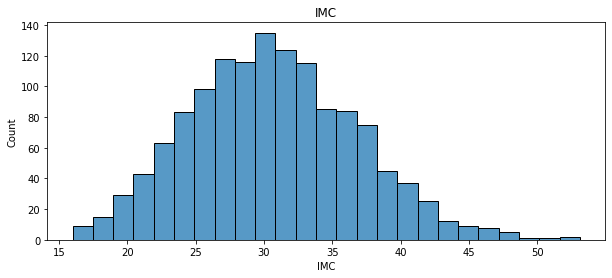

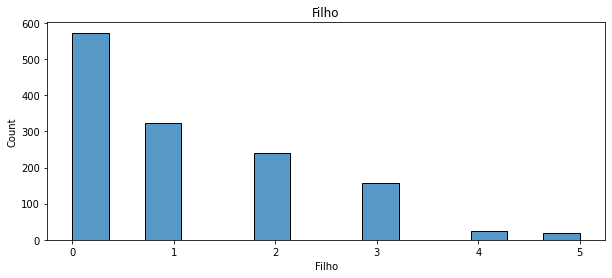

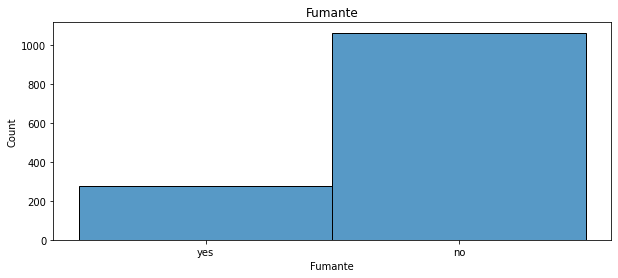

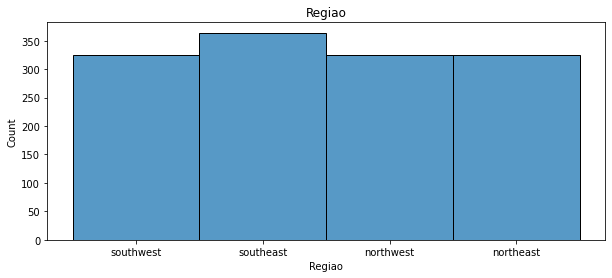

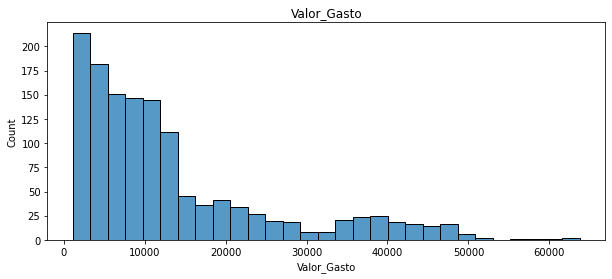

In [ ]:
# Plotar todas as colunas
for Coluna in Base_Dados.columns:
  # Defiindo o tamanho
  plt.figure(figsize=(10,4))
  # Titulo
  plt.title(Coluna)
  # Plot do gráfico
  try:
    sns.histplot( Base_Dados[Coluna] )
  except:
    pass

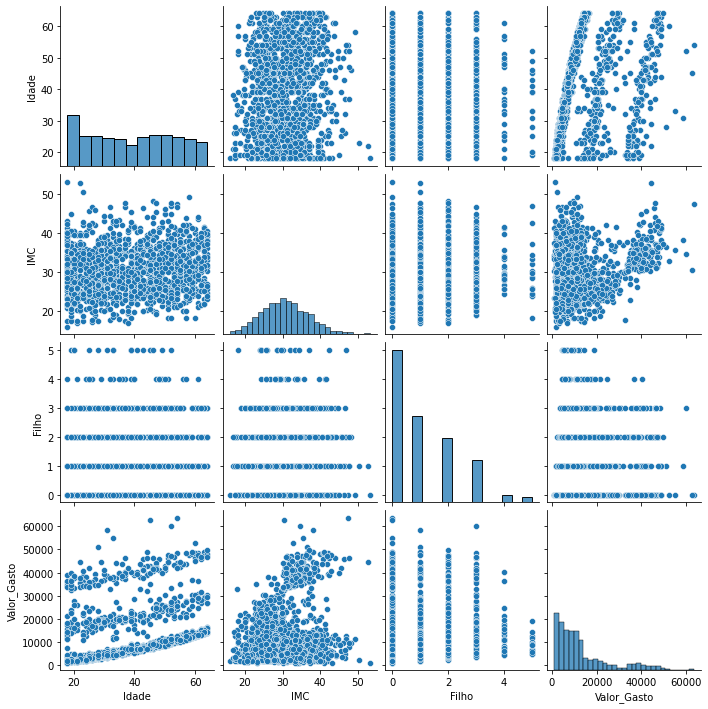

In [ ]:
# Plot Geral
sns.pairplot( Base_Dados )

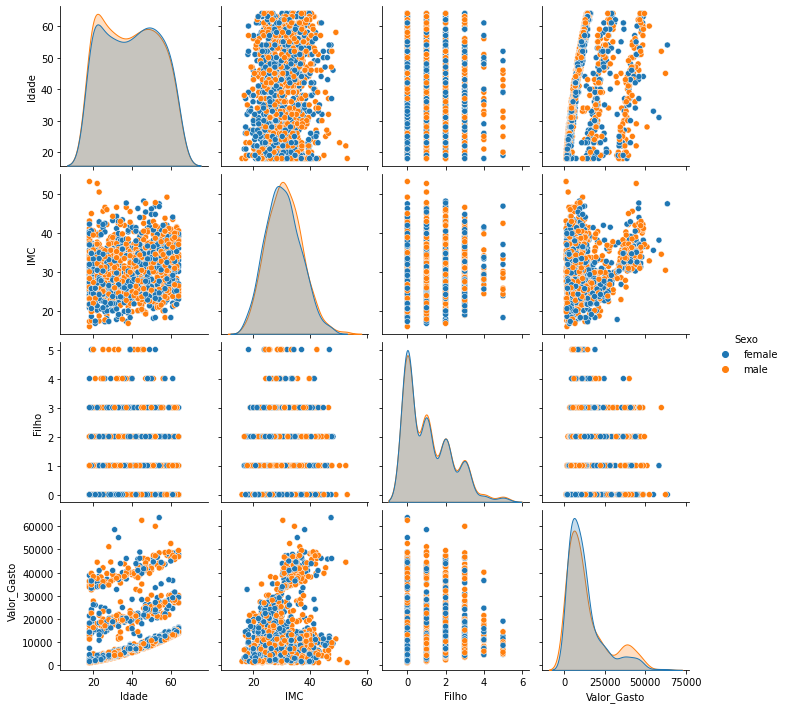

In [ ]:
# Plot Geral
sns.pairplot( Base_Dados, hue='Sexo' )

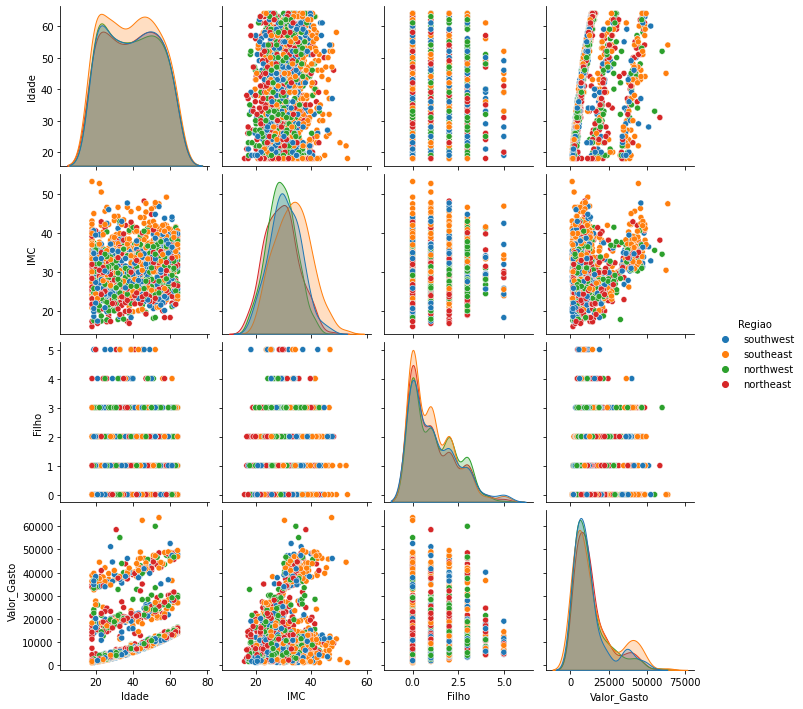

In [ ]:
# Plot Geral
sns.pairplot( Base_Dados, hue='Regiao' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


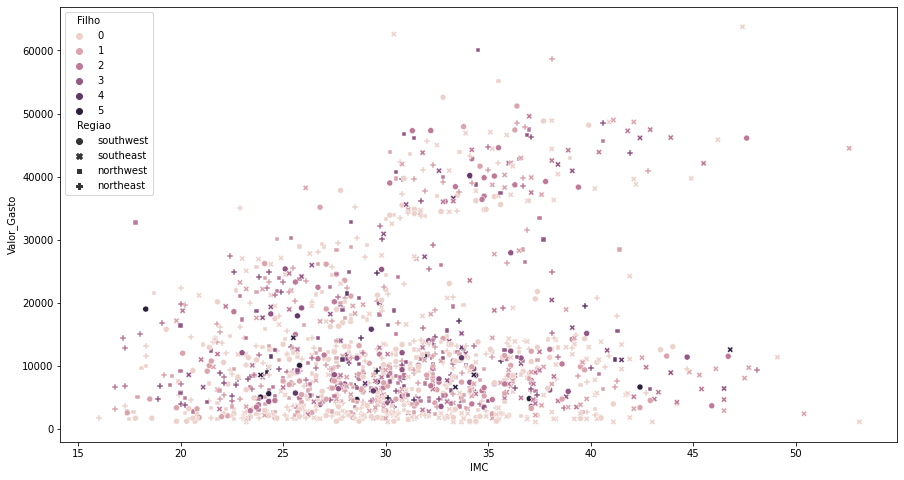

In [ ]:
plt.figure( figsize=(15,8))
sns.scatterplot( Base_Dados['IMC'], 
                Base_Dados['Valor_Gasto'], 
                hue=Base_Dados['Filho'], 
                style=Base_Dados['Regiao']);

## 3º Etapa - Preparação dos dados

In [ ]:
# Preparando os dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Transformar os valores categoricos em numericos
Label_01 = LabelEncoder()
Base_Dados['Sexo'] = Label_01.fit_transform( Base_Dados.Sexo )

Label_02 = LabelEncoder()
Base_Dados['Fumante'] = Label_02.fit_transform( Base_Dados.Fumante )

In [ ]:
# Verificando a transformação
Base_Dados.head()

,Idade,Sexo,IMC,Filho,Fumante,Regiao,Valor_Gasto
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [ ]:
# Transformar os valores categoricos em numericos

# Chamando a função
Label_03 = OneHotEncoder()

# Transformando a região em um vetor com 4 colunas ( 0 ou 1 )
Dados_Regiao = Label_03.fit_transform( Base_Dados.Regiao.values.reshape(-1,1) ).toarray()

# Transformando o vetor em uma tabela
Dados_Regiao_Tabela = pd.DataFrame(Dados_Regiao, columns = ['Nordeste','Noroeste','Sudeste','Sudoeste'] )

# Retirando a coluna Regiao
Base_Dados_02 = Base_Dados.drop('Regiao', axis=1)

# Juntar as bases
Base_Dados_02 = pd.concat( [Base_Dados_02, Dados_Regiao_Tabela], axis=1)

Base_Dados_02.head()

,Idade,Sexo,IMC,Filho,Fumante,Valor_Gasto,Nordeste,Noroeste,Sudeste,Sudoeste
0,19.0,0.0,27.9,0.0,1.0,16884.92,0.0,0.0,0.0,1.0
1,18.0,1.0,33.8,1.0,0.0,1725.55,0.0,0.0,1.0,0.0
2,28.0,1.0,33.0,3.0,0.0,4449.46,0.0,0.0,1.0,0.0
3,33.0,1.0,22.7,0.0,0.0,21984.47,0.0,1.0,0.0,0.0
4,32.0,1.0,28.9,0.0,0.0,3866.86,0.0,1.0,0.0,0.0


In [ ]:
Base_Dados_02 = Base_Dados_02.loc[ Base_Dados_02['Nordeste'].notnull() ]
Base_Dados_02 = Base_Dados_02.loc[ Base_Dados_02['Idade'].notnull() ]

In [ ]:
# Separando os dados
Variaveis_Caracteristica = Base_Dados_02.drop('Valor_Gasto', axis=1)
Variaveil_Prever = Base_Dados_02[['Valor_Gasto']]

# Importando a função para separar os dados de Treino e Teste
from sklearn.model_selection import train_test_split

# Separando os dados
x_treino, x_teste, y_treino, y_teste = train_test_split( Variaveis_Caracteristica, 
                                                        Variaveil_Prever, 
                                                        test_size=0.20, 
                                                        random_state=10 )

print('Dados de Treino: ', len(x_treino) )
print('Dados de Teste: ', len(x_teste) )

Dados de Treino:  1068
Dados de Teste:  268


## 4º Etapa - Criando o Modelo

In [ ]:
# Importando função da Regressão
from sklearn.linear_model import LinearRegression

# Chamando a função e treinando o modelo
Funcao_Regressao_Linear = LinearRegression()
Funcao_Regressao_Linear.fit( x_treino, y_treino )

# extrair coeficientes
Declive = Funcao_Regressao_Linear.coef_
Interceptar = Funcao_Regressao_Linear.intercept_

# Fazendo a previsao dos de teste
Previsao = Funcao_Regressao_Linear.predict( x_teste )


 Score do modelo (R²):  0.7491408129554042

 RMSE 4461.54111461676 



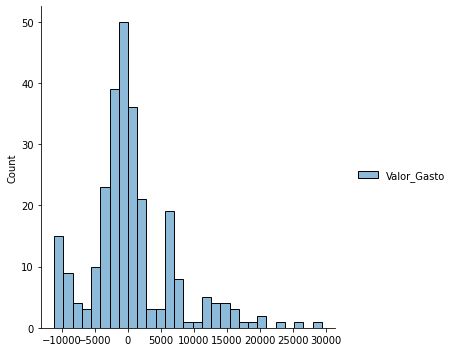

In [ ]:
# Verificando a assertividade do modelo
from sklearn import metrics

# Calculando o score da regressão
Score = Funcao_Regressao_Linear.score( Variaveis_Caracteristica, Variaveil_Prever )

# Calculando o RMSE do modelo
RMSE = metrics.mean_absolute_error( y_teste, Previsao )

print('\n Score do modelo (R²): ', Score)
print('\n RMSE', RMSE , '\n' )
sns.displot( y_teste - Previsao );

## Vamos tentar melhorar nosso modelo ...

vamos utilizar uma regressão linear com floresta aleatoria

In [ ]:
# Importar Lib para nosso pipeline
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline


 Score do modelo (R²):  0.6857814866873981

 RMSE 5451.4448507462685 



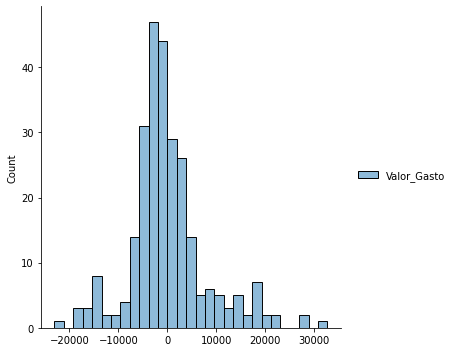

In [ ]:
# Vamos definir nosso pipeline
pipe = Pipeline((
    ('pt',PowerTransformer()),
    ('Poly',PolynomialFeatures(degree=3)),
    ('rfe',RFE(estimator=LinearRegression(),n_features_to_select=70,step=1,verbose=0)),
    ('lr',LinearRegression()),
))

# Vamos ficar o Modelo
pipe.fit(x_treino, y_treino)

# Fazendo a previsao dos de teste
Previsao = pipe.predict( x_teste )

# ----------- Plotando o Erro do Modelo com o Escolanemento

# Verificando a assertividade do modelo
from sklearn import metrics

# Calculando o score da regressão
Score = pipe.score( x_treino, y_treino )

# Calculando o RMSE do modelo
RMSE = metrics.mean_absolute_error( y_teste, Previsao )

print('\n Score do modelo (R²): ', Score)
print('\n RMSE', RMSE , '\n' )
sns.displot( y_teste - Previsao );


# Nesse caso do PipeLine, o erro aumentou ;D